In [45]:
import os

# Change the working directory
os.chdir("/Users/sbrya")

cwd = os.getcwd()
print(cwd)

c:\Users\sbrya


# Market Basket Analysis
### Read-in

First step is to read in the data and make sure it's present.

A: https://www.kaggle.com/datasets/akashdeepkuila/bakery

B: https://www.kaggle.com/datasets/akashdeepkuila/bakery

### Standard procedure for market basket analysis
1. Generate large set of rules
2. Filter rules using metrics
3. Apply intuition and common sense.


### If This, Then That
Market Basket Analysis delves into the rules of  *association* between the different items in a given customer's basket. For example, if a grocery store shopper buys bread, then they could be more likely to buy butter, or vice versa. The Market Basket Analysis allows us to determine the likelihood that the selection of one product, the **antecedent** $X$, leads to the selection of another item the **consequent** $Y$:

$X \rightarrow Y$

In [46]:
import pandas as pd

basket = {1:["milk", "egg", "bread", "butter"],
          2:["milk", "butter", "egg", "ketchup", "butter"],
          3:["bread", "butter", "ketchup"],
          4:["milk", "bread", "butter"],
          5:["bread", "butter", "cookies"],
          6:["milk", "bread", "butter", "cookies"],
          7:["milk", "cookies"],
          8:["milk", "bread", "butter"],
          9:["bread", "butter", "egg", "cookies"],
          10:["milk", "butter", "bread"],
          11:["milk", "bread"],
          12:["milk", "bread", "cookies", "ketchup"]}

[print(f"Transaction {i}:", basket[i]) for i in basket]

unique_items = set()
for items in basket.values():
  for item in items:
    unique_items.add(item)
print("\n\nUnique Items: ", list(unique_items))

Transaction 1: ['milk', 'egg', 'bread', 'butter']
Transaction 2: ['milk', 'butter', 'egg', 'ketchup', 'butter']
Transaction 3: ['bread', 'butter', 'ketchup']
Transaction 4: ['milk', 'bread', 'butter']
Transaction 5: ['bread', 'butter', 'cookies']
Transaction 6: ['milk', 'bread', 'butter', 'cookies']
Transaction 7: ['milk', 'cookies']
Transaction 8: ['milk', 'bread', 'butter']
Transaction 9: ['bread', 'butter', 'egg', 'cookies']
Transaction 10: ['milk', 'butter', 'bread']
Transaction 11: ['milk', 'bread']
Transaction 12: ['milk', 'bread', 'cookies', 'ketchup']


Unique Items:  ['cookies', 'ketchup', 'egg', 'bread', 'butter', 'milk']


### Frequency
$Frequency(X)$

In [47]:
item_frequency = {}
for key, value in basket.items():
    for item in value:
        if item in item_frequency:
            item_frequency[item] += 1
        else:
            item_frequency[item] = 1

df = pd.DataFrame({'item': list(item_frequency.keys()), 'frequency': list(item_frequency.values())})
df

,item,frequency
0,milk,9
1,egg,3
2,bread,10
3,butter,10
4,ketchup,3
5,cookies,5


### Support
$Support(X) = \frac{Frequency(X)}{N}$

$Support(X \rightarrow Y) = \frac{Frequency(X\&Y)}{N}$

Or more simply, the support of any item $X$ is the number of transactions with that item ($Frequency(X)$) divided by the total number of transactions $N$.

In [48]:
total_transactions = len(basket) # 12 transactions in the original market basket data

# Calculate support percentage
df['support'] = (df['frequency'] / total_transactions).round(2)

df

,item,frequency,support
0,milk,9,0.75
1,egg,3,0.25
2,bread,10,0.83
3,butter,10,0.83
4,ketchup,3,0.25
5,cookies,5,0.42


### Confidence
##### $Confidence(X \rightarrow Y) = \frac{Support(X \& Y)}{Support(X)}$

The probability that Item $Y$ will be purchased, given the purchase of Item $X$.

### Lift
$Lift(X \rightarrow Y) = \frac{Support(X \rightarrow Y)}{Support(X) \times Support(Y)}$

### Leverage


# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


## Bakery Sales Data

This dataset covers transactions from a Korean bakery, and comes from Kaggle: https://www.kaggle.com/datasets/hosubjeong/bakery-sales/data

In [49]:
import pandas as pd

# Load the dataset
bakery_data = pd.read_csv('Downloads/Bakery Sales.csv')

# Check the first few rows of the dataset
print(bakery_data.head().to_markdown())
print(bakery_data.info())
print(bakery_data.describe(include='all'))

|    | datetime         | day of week   |   total |   place |   angbutter |   plain bread |   jam |   americano |   croissant |   caffe latte |   tiramisu croissant |   cacao deep |   pain au chocolat |   almond croissant |   croque monsieur |   mad garlic |   milk tea |   gateau chocolat |   pandoro |   cheese cake |   lemon ade |   orange pound |   wiener |   vanila latte |   berry ade |   tiramisu |   merinque cookies |
|---:|:-----------------|:--------------|--------:|--------:|------------:|--------------:|------:|------------:|------------:|--------------:|---------------------:|-------------:|-------------------:|-------------------:|------------------:|-------------:|-----------:|------------------:|----------:|--------------:|------------:|---------------:|---------:|---------------:|------------:|-----------:|-------------------:|
|  0 | 2019-07-11 15:35 | Thur          |   23800 |     nan |           1 |           nan |   nan |           1 |         nan |           nan |   

                datetime day of week         total place    angbutter  \
count               2421        2420  2.420000e+03  2166  1973.000000   
unique              2361           7           NaN    19          NaN   
top     2019-11-09 11:36         Sun           NaN    동면          NaN   
freq                   9         554           NaN   416          NaN   
mean                 NaN         NaN  2.117252e+04   NaN     1.636594   
std                  NaN         NaN  2.699727e+04   NaN     1.115636   
min                  NaN         NaN  1.280000e+04   NaN     1.000000   
25%                  NaN         NaN  1.580000e+04   NaN     1.000000   
50%                  NaN         NaN  1.850000e+04   NaN     1.000000   
75%                  NaN         NaN  2.300000e+04   NaN     2.000000   
max                  NaN         NaN  1.293000e+06   NaN    11.000000   

        plain bread         jam   americano   croissant  caffe latte  ...  \
count    857.000000  220.000000  412.000000  7

The above `info()` and `describe()` outputs informs us about the cumber of transactions each bakery item is included in, which is helpful. We can see that products like the "plain bread", the croissant, and importantly, the angbutter bread -- a Korean-signature pastry including butter and red beans on pretzel-like bun. We'll notice this angbutter item much more as we continue. Additionally, we can also observe that items like the "croque monsieur", the "mad garlic", and the tiramisu are pretty weak sellers by relative comparison.

We can see that the basket data has already been set to a wide format, where each bakery item has been encoded in a numeric fashion. Each row covers a separate transaction, and can include multiple items. There are instances of multiple transactions occuring at the same time, but this seems to be due to the bakery data covering multiple store locations; some of the locations also probably have multiple POS systems, which can explain instances of different tranactions occuring at the same time and location.

In [50]:
bakery_data.angbutter.count()

1973

In [51]:
print(bakery_data[['datetime', 'place']].value_counts().sort_values(ascending=False), "\n\n")
print(bakery_data[(bakery_data.datetime == "2019-10-03 14:50") & (bakery_data.place == "후평 2동")].to_markdown())

datetime          place
2019-10-03 14:50  후평 2동    2
2019-10-21 11:27  강남동      2
2020-04-02 13:12  석사동      2
2020-03-01 11:06  동면       2
2020-02-02 11:05  동면       2
                          ..
2020-05-01 15:03  동면       1
2020-05-01 15:19  동면       1
2020-05-02 11:37  동면       1
2020-05-02 11:39  후평 1동    1
2020-05-02 14:45  효자 1동    1
Name: count, Length: 2158, dtype: int64 


|     | datetime         | day of week   |   total | place    |   angbutter |   plain bread |   jam |   americano |   croissant |   caffe latte |   tiramisu croissant |   cacao deep |   pain au chocolat |   almond croissant |   croque monsieur |   mad garlic |   milk tea |   gateau chocolat |   pandoro |   cheese cake |   lemon ade |   orange pound |   wiener |   vanila latte |   berry ade |   tiramisu |   merinque cookies |
|----:|:-----------------|:--------------|--------:|:---------|------------:|--------------:|------:|------------:|------------:|--------------:|---------------------:|-------------:|--

In [52]:
# Make sure the 'datetime' column is in the correct datetime format
bakery_data['datetime'] = pd.to_datetime(bakery_data['datetime'])

# Find the minimum and maximum datetime values
min_datetime = bakery_data['datetime'].min()
max_datetime = bakery_data['datetime'].max()

# Print the results
print(f"Minimum datetime: {min_datetime}")
print(f"Maximum datetime: {max_datetime}")

Minimum datetime: 2019-07-11 15:35:00
Maximum datetime: 2020-06-18 14:52:00


In [53]:
print(bakery_data.place.value_counts().sort_values(ascending=False))

print(print(bakery_data.place.unique()))

place
동면       416
후평 2동    254
후평 3동    249
후평 1동    196
석사동      169
퇴계동      146
효자 2동    143
소양동      132
신사우동      91
효자 3동     80
교동        65
강남동       52
효자 1동     50
조운동       37
동내면       31
근화동       29
약사명동      23
교동         2
신동면        1
Name: count, dtype: int64
[nan '효자 3동' '후평 1동' '후평 2동' '석사동' '소양동' '퇴계동' '동면' '후평 3동' '신사우동' '강남동'
 '효자 1동' '조운동' '교동' '효자 2동' '약사명동' '근화동' '동내면' '교동 ' '신동면']
None


In [54]:
# Translation dictionary
place_translation = {
    '효자 3동': 'Hyoja 3-dong',
    '후평 1동': 'Hupyeong 1-dong',
    '후평 2동': 'Hupyeong 2-dong',
    '석사동': 'Seoksadong',
    '소양동': 'Soyangdong',
    '퇴계동': 'Toegye-dong',
    '동면': 'Dongmyeon',
    '후평 3동': 'Hupyeong 3-dong',
    '신사우동': 'Sinsa-u-dong',
    '강남동': 'Gangnam-dong',
    '효자 1동': 'Hyoja 1-dong',
    '조운동': 'Jo-un-dong',
    '교동': 'Gyo-dong',
    '효자 2동': 'Hyoja 2-dong',
    '약사명동': 'Yaksamyeong-dong',
    '근화동': 'Geunhwa-dong',
    '동내면': 'Dongnae-myeon',
    '교동 ': 'Gyo-dong',
    '신동면': 'Sindong-myeon'
}

# Replace values in the 'place' column of your DataFrame
bakery_data['place'] = bakery_data['place'].map(place_translation).fillna(bakery_data['place'])


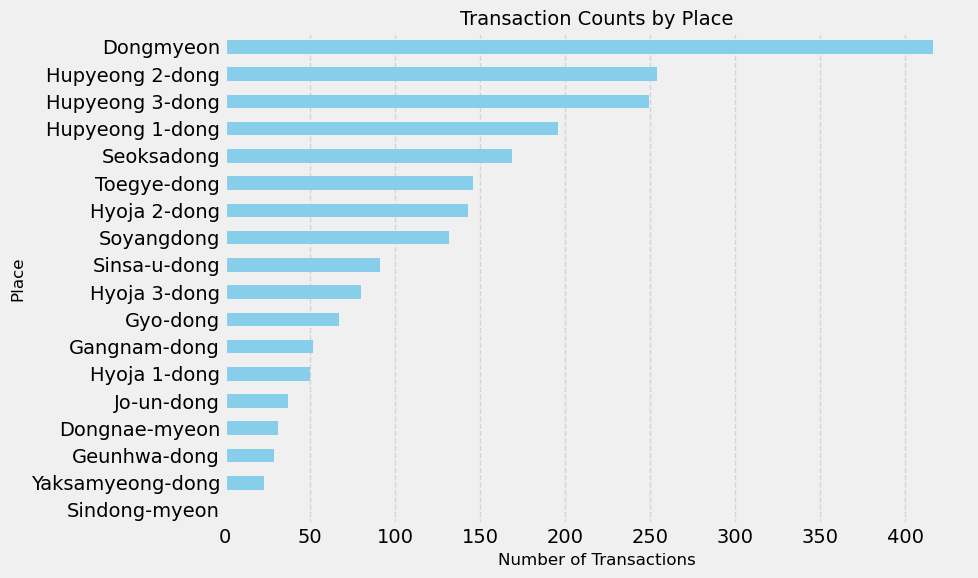

In [55]:
import matplotlib.pyplot as plt

# Set the matplotlib style to 'fivethirtyeight'
plt.style.use('fivethirtyeight')

# Count the number of transactions for each place and sort in descending order
place_counts = bakery_data['place'].value_counts().sort_values(ascending=True)

# Create the bar chart with switched axes
plt.figure(figsize=(10, 6))
place_counts.plot(kind='barh', color='skyblue')  # 'barh' for horizontal bars

# Add labels and title
plt.title('Transaction Counts by Place', fontsize=14)
plt.ylabel('Place', fontsize=12)
plt.xlabel('Number of Transactions', fontsize=12)

# Add faint grid lines along the x-axis (horizontal grid lines)
plt.grid(axis='x', linestyle='--', alpha=0.75)
# Dropping gridlines from the place axis
plt.grid(axis='y', linestyle='--', alpha=0)

# Show the plot
plt.tight_layout()
plt.show()


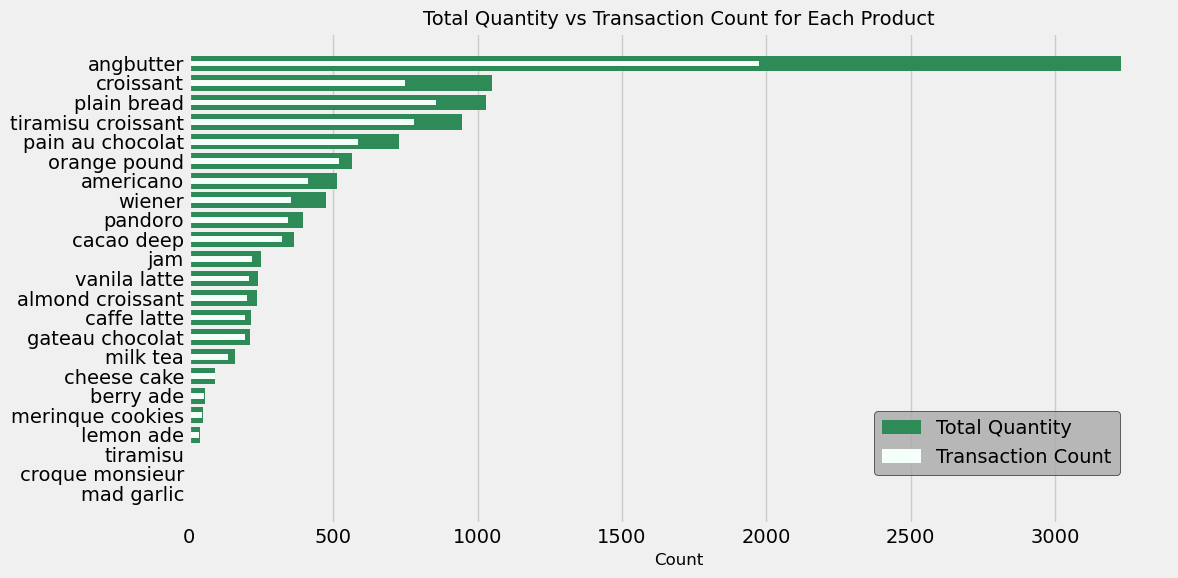

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

# List of product columns (replace these with actual product column names from your data)
product_columns = ['angbutter', 'plain bread', 'jam', 'americano', 'croissant', 
                   'caffe latte', 'tiramisu croissant', 'cacao deep', 'pain au chocolat', 
                   'almond croissant', 'croque monsieur', 'mad garlic', 'milk tea', 
                   'gateau chocolat', 'pandoro', 'cheese cake', 'lemon ade', 
                   'orange pound', 'wiener', 'vanila latte', 'berry ade', 'tiramisu', 
                   'merinque cookies']

# 1. Calculate the total quantities of each product across all transactions
total_quantities = bakery_data[product_columns].sum()

# 2. Calculate the number of transactions each product appears in (i.e., count non-zero entries)
transaction_counts = (bakery_data[product_columns] > 0).sum()

# 3. Combine both metrics into one DataFrame for easy plotting
metrics_df = pd.DataFrame({
    'Product': product_columns,
    'Total Quantity': total_quantities,
    'Transaction Count': transaction_counts
})

# 4. Sort by Total Quantity (ascending order)
metrics_df = metrics_df.sort_values(by='Total Quantity', ascending=True)

# 5. Set up a position range for the bars
x = range(len(metrics_df))

# 7. Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 6))

# 8. Plot Total Quantity (larger bar width)
ax.barh(x, metrics_df['Total Quantity'], 0.8, color='seagreen', label='Total Quantity')

# 9. Plot Transaction Count (smaller bar width, overlayed on top of Total Quantity)
ax.barh(x, metrics_df['Transaction Count'], 0.3, color='mintcream', label='Transaction Count')

# 10. Set labels and title
ax.set_yticks(x)
ax.set_yticklabels(metrics_df['Product'])
ax.set_xlabel('Count', fontsize=12)
ax.set_title('Total Quantity vs Transaction Count for Each Product', fontsize=14)

# Move the legend to the upper left corner
ax.legend(facecolor='darkgray', edgecolor='black', loc=(0.7, 0.1))


# Dropping gridlines from the product axis
plt.grid(axis='y', linestyle='--', alpha=0)

# Show plot
plt.tight_layout()
plt.show()


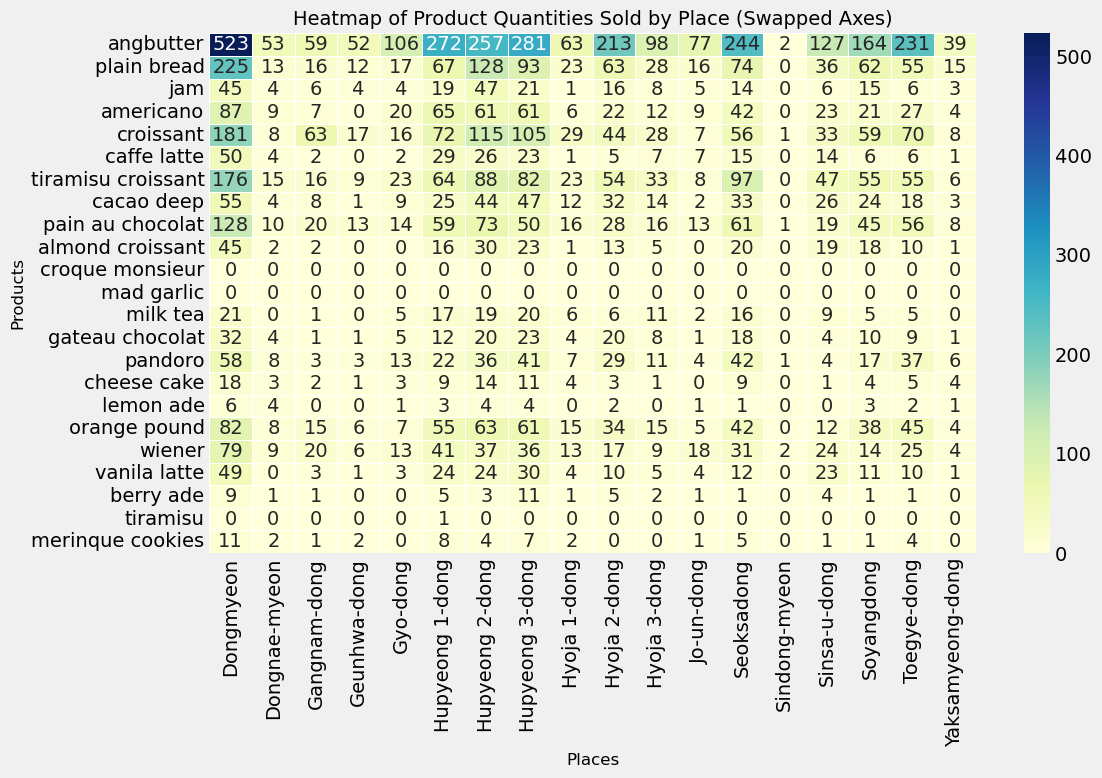

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# List of product columns (replace these with actual product column names from your data)
product_columns = ['angbutter', 'plain bread', 'jam', 'americano', 'croissant', 
                   'caffe latte', 'tiramisu croissant', 'cacao deep', 'pain au chocolat', 
                   'almond croissant', 'croque monsieur', 'mad garlic', 'milk tea', 
                   'gateau chocolat', 'pandoro', 'cheese cake', 'lemon ade', 
                   'orange pound', 'wiener', 'vanila latte', 'berry ade', 'tiramisu', 
                   'merinque cookies']

# 1. Group the data by 'place' and sum the quantities for each product
product_place_data = bakery_data.groupby('place')[product_columns].sum()

# 2. Transpose the DataFrame to swap the axes (places become rows and products become columns)
product_place_data = product_place_data.T  # Transpose the DataFrame

# 3. Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(product_place_data, annot=True, fmt="g", cmap="YlGnBu", linewidths=0.5)

# 4. Set labels and title
plt.xlabel('Places', fontsize=12)
plt.ylabel('Products', fontsize=12)
plt.title('Heatmap of Product Quantities Sold by Place (Swapped Axes)', fontsize=14)

# 5. Show the plot
plt.tight_layout()
plt.show()


C:\Users\sbrya\AppData\Local\Temp\ipykernel_43980\3088397974.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot = product_place_data_percentage.round(2).applymap(lambda x: f"{x:.1f}%")


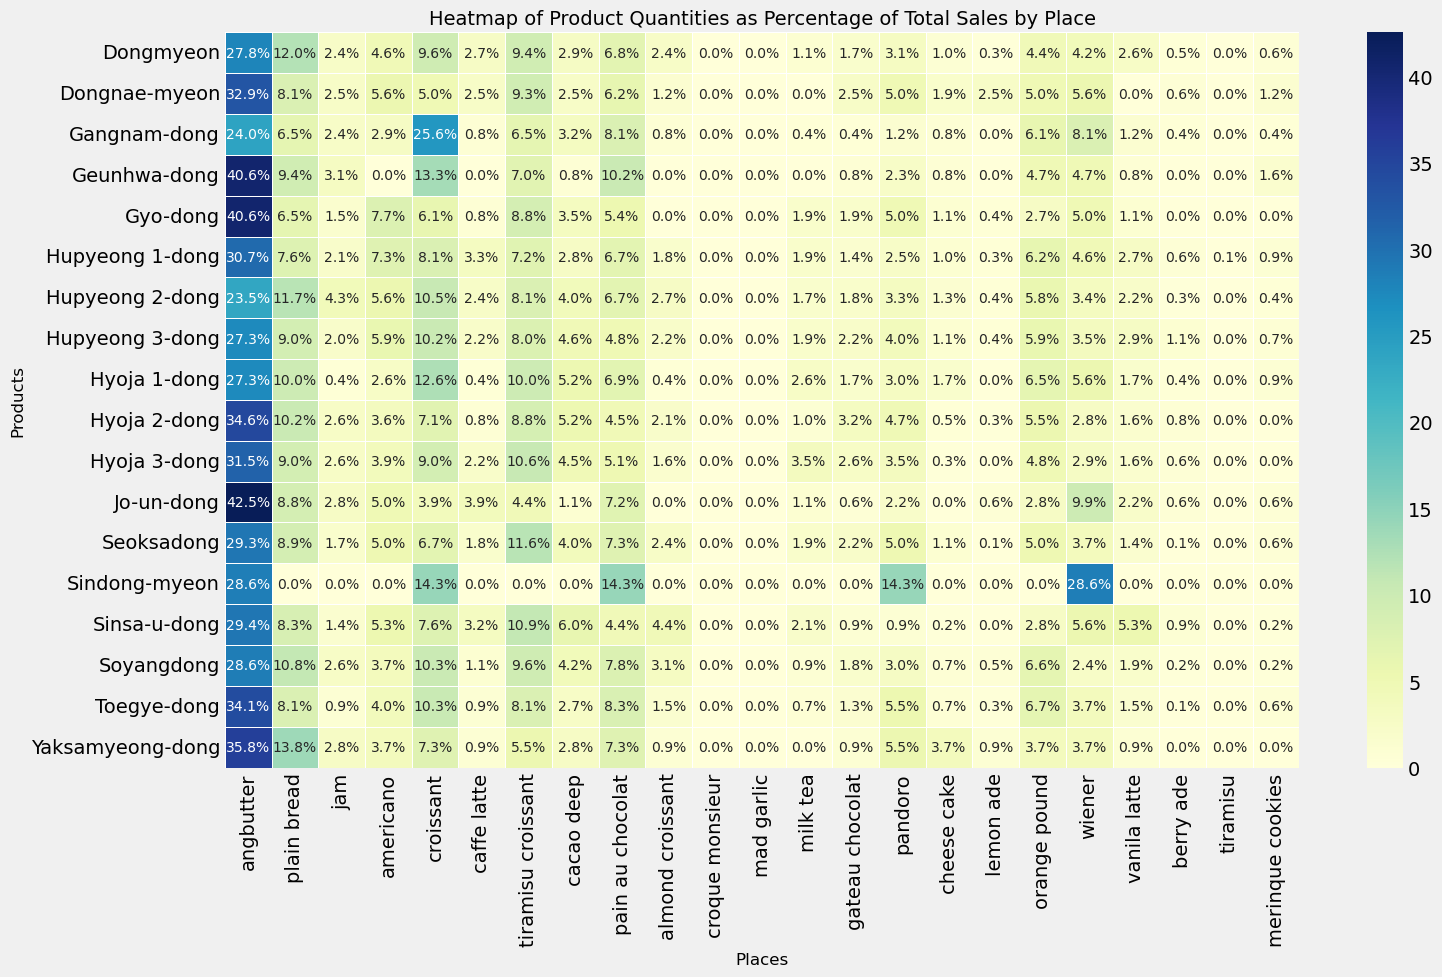

In [58]:
# 1. Group the data by 'place' and sum the quantities for each product
product_place_data = bakery_data.groupby('place')[product_columns].sum()

# 2. Normalize each row by dividing by the row total to get the percentage of total sales per store
product_place_data_percentage = product_place_data.div(product_place_data.sum(axis=1), axis=0) * 100

# 3. Create the heatmap
plt.figure(figsize=(16, 10))  # Increase the figure dimensions

# Create custom annotations with percentage suffix
annot = product_place_data_percentage.round(2).applymap(lambda x: f"{x:.1f}%")

# Create the heatmap
sns.heatmap(product_place_data_percentage, annot=annot, cmap="YlGnBu", linewidths=0.5, annot_kws={'size': 10}, fmt='')

# 4. Set labels and title
plt.xlabel('Places', fontsize=12)
plt.ylabel('Products', fontsize=12)
plt.title('Heatmap of Product Quantities as Percentage of Total Sales by Place', fontsize=14)

# 5. Show the plot
plt.tight_layout()
plt.show()

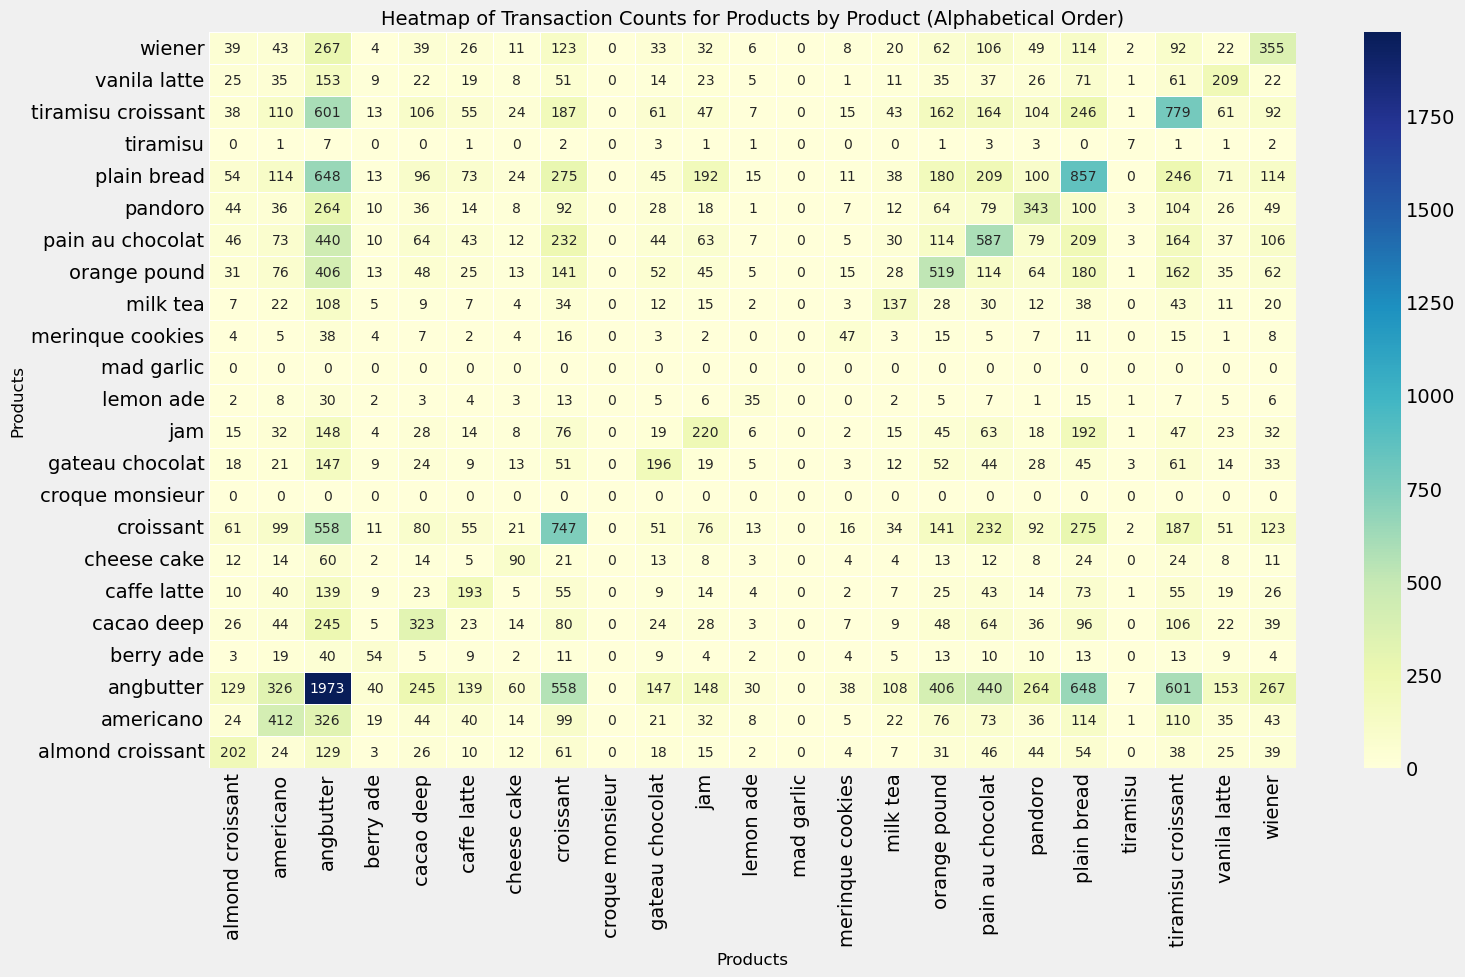

In [59]:


# 1. Create a binary matrix indicating if a product was purchased in a transaction
product_binary_data = bakery_data[product_columns].gt(0).astype(int)

# 2. Create a product co-occurrence matrix by multiplying the binary matrix with its transpose
co_occurrence_matrix = product_binary_data.T.dot(product_binary_data)

# 3. Sort the matrix rows and columns alphabetically (ascending)
sorted_co_occurrence_matrix = co_occurrence_matrix.sort_index(axis=0, ascending=False).sort_index(axis=1)

# 4. Plot the heatmap of product co-occurrence counts
plt.figure(figsize=(16, 10))  # Adjust the figure size as needed
sns.heatmap(sorted_co_occurrence_matrix, annot=True, annot_kws={'size': 10}, fmt="d", cmap="YlGnBu", linewidths=0.5)

# 5. Set labels and title
plt.xlabel('Products', fontsize=12)
plt.ylabel('Products', fontsize=12)
plt.title('Heatmap of Transaction Counts for Products by Product (Alphabetical Order)', fontsize=14)

# 6. Show the plot
plt.tight_layout()
plt.show()


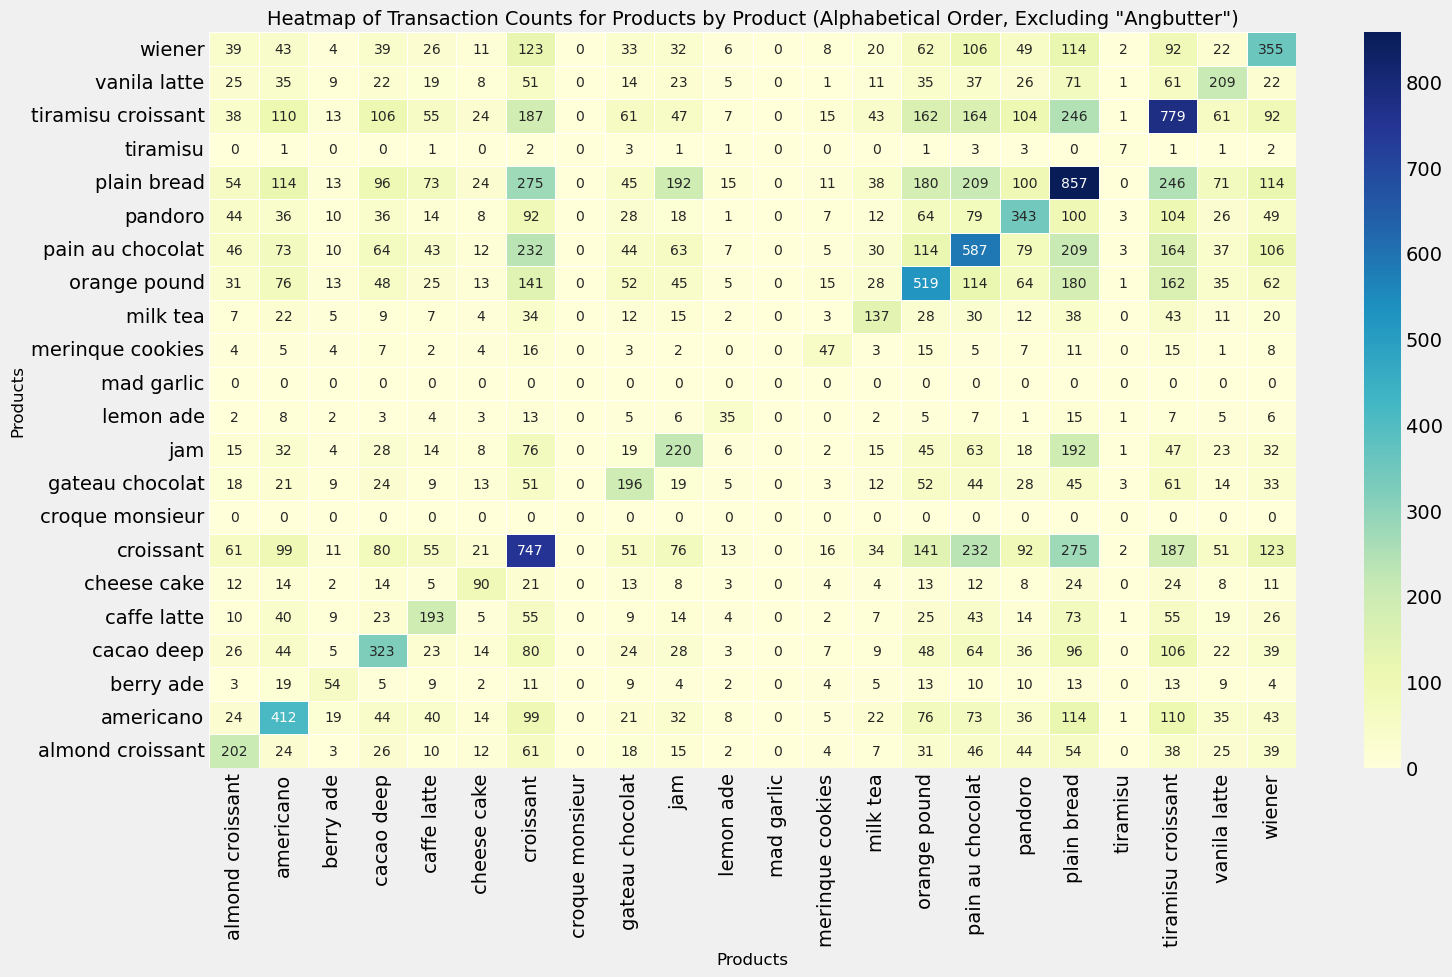

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# List of product columns (without 'angbutter')
sans_angbutter = ['plain bread', 'jam', 'americano', 'croissant', 
                   'caffe latte', 'tiramisu croissant', 'cacao deep', 'pain au chocolat', 
                   'almond croissant', 'croque monsieur', 'mad garlic', 'milk tea', 
                   'gateau chocolat', 'pandoro', 'cheese cake', 'lemon ade', 
                   'orange pound', 'wiener', 'vanila latte', 'berry ade', 'tiramisu', 
                   'merinque cookies']

# 1. Create a binary matrix indicating if a product was purchased in a transaction
product_binary_data = bakery_data[sans_angbutter].gt(0).astype(int)

# 2. Create a product co-occurrence matrix by multiplying the binary matrix with its transpose
co_occurrence_matrix = product_binary_data.T.dot(product_binary_data)

# 3. Sort the matrix rows and columns alphabetically (ascending)
sorted_co_occurrence_matrix = co_occurrence_matrix.sort_index(axis=0, ascending=False).sort_index(axis=1)

# 4. Plot the heatmap of product co-occurrence counts
plt.figure(figsize=(16, 10))  # Adjust the figure size as needed
sns.heatmap(sorted_co_occurrence_matrix, annot=True, annot_kws={'size': 10}, fmt="d", cmap="YlGnBu", linewidths=0.5)

# 5. Set labels and title
plt.xlabel('Products', fontsize=12)
plt.ylabel('Products', fontsize=12)
plt.title('Heatmap of Transaction Counts for Products by Product (Alphabetical Order, Excluding "Angbutter")', fontsize=14)

# 6. Show the plot
plt.tight_layout()
plt.show()


C:\Users\sbrya\AppData\Local\Temp\ipykernel_43980\4144797702.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_weekday.index, y=sales_by_weekday.values, palette="Blues_d")


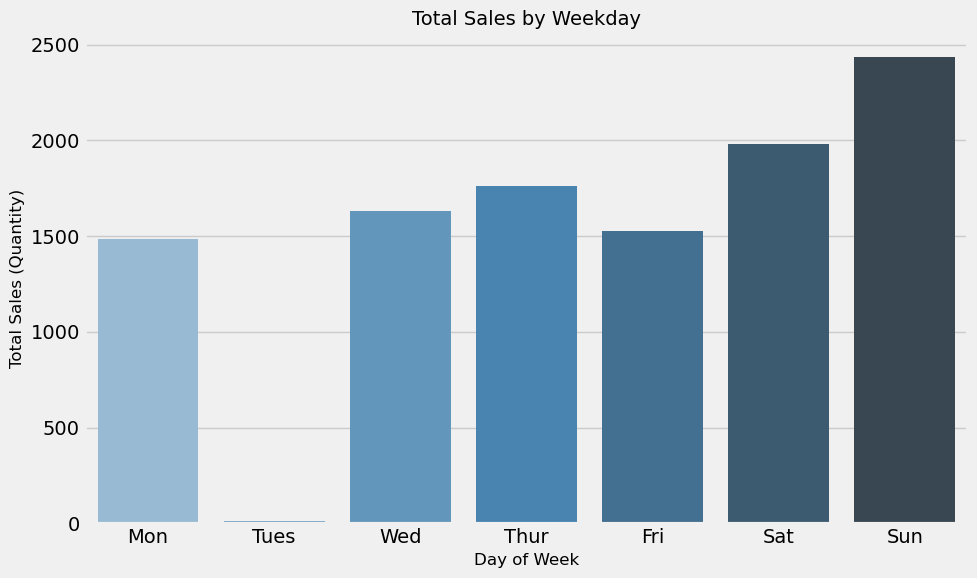

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sum the total sales by day of the week
bakery_data['total_sales'] = bakery_data[product_columns].sum(axis=1)
sales_by_weekday = bakery_data.groupby('day of week')['total_sales'].sum()

# Reorder the days of the week for correct order in the plot
ordered_weekdays = ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
sales_by_weekday = sales_by_weekday[ordered_weekdays]

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_weekday.index, y=sales_by_weekday.values, palette="Blues_d")

# Add labels and title
plt.title('Total Sales by Weekday', fontsize=14)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Total Sales (Quantity)', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


In [62]:
# Filter rows where the 'datetime' is on a Tuesday
tuesday_sales = bakery_data[bakery_data['day of week'] == 'Tues']

# Drop columns where all values are NaN
tuesday_sales = tuesday_sales.dropna(axis=1, how='all')

# Display the rows for Tuesday with cleaned columns
print(tuesday_sales.to_markdown())

|      | datetime            | day of week   |   total | place           |   angbutter |   americano |   tiramisu croissant |   gateau chocolat |   cheese cake |   wiener |   merinque cookies |   total_sales |
|-----:|:--------------------|:--------------|--------:|:----------------|------------:|------------:|---------------------:|------------------:|--------------:|---------:|-------------------:|--------------:|
| 1277 | 2019-12-24 11:13:00 | Tues          |   15300 | Dongmyeon       |           1 |           1 |                    1 |               nan |           nan |      nan |                nan |             3 |
| 1278 | 2019-12-24 11:17:00 | Tues          |   21400 | Jo-un-dong      |           3 |         nan |                  nan |               nan |           nan |        2 |                nan |             5 |
| 1279 | 2019-12-24 13:14:00 | Tues          |   19300 | Hupyeong 1-dong |         nan |         nan |                    1 |                 1 |             1 

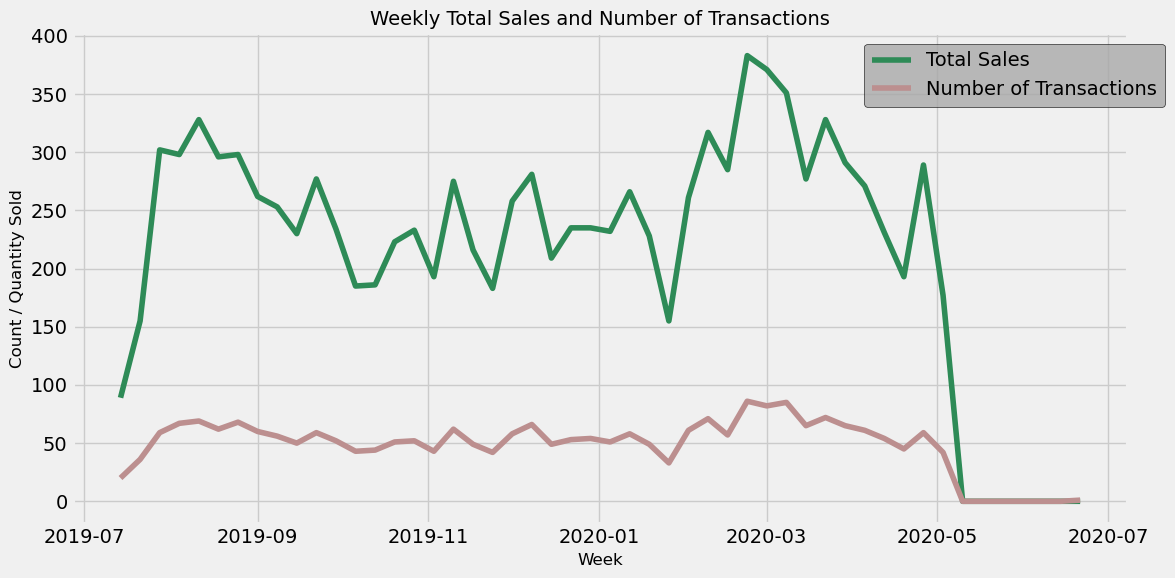

In [63]:
import matplotlib.pyplot as plt
import pandas as pd


# Create a copy of the original DataFrame (without modifying it) and name it "bakery_ts"
bakery_ts = bakery_data.copy()

# Ensure the 'datetime' column is in the correct datetime format
bakery_ts['datetime'] = pd.to_datetime(bakery_ts['datetime'])

# Set 'datetime' as the index for easier time series manipulation
bakery_ts.set_index('datetime', inplace=True)

# Aggregate the total sales for all products per transaction
bakery_ts['total_sales'] = bakery_ts[product_columns].sum(axis=1)

# Resample the total sales by week (weekly level of detail)
weekly_sales = bakery_ts['total_sales'].resample('W').sum()

# Resample the number of transactions (count of rows) by week
weekly_transactions = bakery_ts.resample('W').size()

# Plot the line chart for total product sales and number of transactions over time
plt.figure(figsize=(12, 6))

# Plot total sales line
plt.plot(weekly_sales.index, weekly_sales.values, label='Total Sales', color='seagreen')

# Plot transaction count line
plt.plot(weekly_transactions.index, weekly_transactions.values, label='Number of Transactions', color='rosybrown')

# Adding labels and title
plt.title('Weekly Total Sales and Number of Transactions', fontsize=14)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Count / Quantity Sold', fontsize=12)

# Move the legend to the upper left corner
plt.legend(facecolor='darkgray', edgecolor='black', loc=(0.75, 0.85))

# Display the plot
plt.tight_layout()
plt.show()


In [64]:
bread_sales = bakery_data[(bakery_data['plain bread']>1) & (bakery_data['croissant']>1)][['datetime', 'day of week', 'total', 'place', 'plain bread', 'croissant']]
print(bread_sales.to_markdown())

|      | datetime            | day of week   |         total | place           |   plain bread |   croissant |
|-----:|:--------------------|:--------------|--------------:|:----------------|--------------:|------------:|
|   87 | 2019-07-26 11:23:00 | Fri           | 73200         | nan             |             3 |           6 |
|   89 | 2019-07-26 11:36:00 | Fri           |     1.293e+06 | nan             |             5 |           5 |
|  141 | 2019-08-01 12:24:00 | Thur          | 32600         | nan             |             2 |           2 |
|  254 | 2019-08-12 12:39:00 | Mon           | 24300         | Hyoja 3-dong    |             2 |           3 |
|  350 | 2019-08-23 11:28:00 | Fri           | 42200         | Dongmyeon       |             3 |           3 |
|  976 | 2019-11-15 16:30:00 | Fri           | 70700         | Dongmyeon       |             5 |           4 |
| 1183 | 2019-12-11 14:26:00 | Wed           | 32000         | Soyangdong      |             2 |           2 |
|

In [65]:
print(bakery_data.columns)

Index(['datetime', 'day of week', 'total', 'place', 'angbutter', 'plain bread',
       'jam', 'americano', 'croissant', 'caffe latte', 'tiramisu croissant',
       'cacao deep', 'pain au chocolat', 'almond croissant', 'croque monsieur',
       'mad garlic', 'milk tea', 'gateau chocolat', 'pandoro', 'cheese cake',
       'lemon ade', 'orange pound', 'wiener', 'vanila latte', 'berry ade',
       'tiramisu', 'merinque cookies', 'total_sales'],
      dtype='object')


In [66]:
# Select columns related to items (food items)
item_columns = ['angbutter', 'plain bread', 'jam', 'americano', 'croissant', 'caffe latte', 
                'tiramisu croissant', 'cacao deep', 'pain au chocolat', 'almond croissant', 
                'croque monsieur', 'mad garlic', 'milk tea', 'gateau chocolat', 'pandoro', 
                'cheese cake', 'lemon ade', 'orange pound', 'wiener', 'vanila latte', 
                'berry ade', 'tiramisu', 'merinque cookies']

# Create a basket where each column represents an item and 1 indicates a purchase of that item
basket = bakery_data[item_columns].applymap(lambda x: 1 if x > 0 else 0)


C:\Users\sbrya\AppData\Local\Temp\ipykernel_43980\4195869704.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = bakery_data[item_columns].applymap(lambda x: 1 if x > 0 else 0)


In [67]:
from mlxtend.frequent_patterns import apriori, association_rules

# Apply the Apriori algorithm to find frequent itemsets with a minimum support of 0.1 (10%)
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)

# Generate association rules with a minimum lift of 1
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1, num_itemsets=4000)

# Show the first 10 association rules
print(rules.to_markdown())


|    | antecedents                                  | consequents                                  |   antecedent support |   consequent support |   support |   confidence |    lift |   representativity |    leverage |   conviction |   zhangs_metric |   jaccard |   certainty |   kulczynski |
|---:|:---------------------------------------------|:---------------------------------------------|---------------------:|---------------------:|----------:|-------------:|--------:|-------------------:|------------:|-------------:|----------------:|----------:|------------:|-------------:|
|  0 | frozenset({'angbutter'})                     | frozenset({'plain bread'})                   |            0.743406  |            0.322909  | 0.24416   |    0.328434  | 1.01711 |                  1 | 0.00410735  |      1.00823 |      0.0655604  | 0.296975  |  0.00815996 |     0.54228  |
|  1 | frozenset({'plain bread'})                   | frozenset({'angbutter'})                     |            0.322909 

c:\Users\sbrya\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


|    | antecedents                       | consequents                       |   antecedent support |   consequent support |   support |   confidence |    lift |   representativity |   leverage |   conviction |   zhangs_metric |   jaccard |   certainty |   kulczynski |
|---:|:----------------------------------|:----------------------------------|---------------------:|---------------------:|----------:|-------------:|--------:|-------------------:|-----------:|-------------:|----------------:|----------:|------------:|-------------:|
|  0 | frozenset({'plain bread'})        | frozenset({'angbutter'})          |             0.322909 |             0.743406 |  0.24416  |     0.756126 | 1.01711 |                  1 | 0.00410735 |      1.05216 |      0.0248451  |  0.296975 |  0.0495719  |     0.54228  |
|  1 | frozenset({'angbutter'})          | frozenset({'plain bread'})        |             0.743406 |             0.322909 |  0.24416  |     0.328434 | 1.01711 |                  1 | 0.00410735 |      1.00823 |      0.0655604  |  0.296975 |  0.00815996 |     0.54228  |
|  2 | frozenset({'americano'})          | frozenset({'angbutter'})          |             0.155237 |             0.743406 |  0.122833 |     0.791262 | 1.06437 |                  1 | 0.00742903 |      1.22926 |      0.0715947  |  0.158329 |  0.186505   |     0.478246 |
|  3 | frozenset({'angbutter'})          | frozenset({'americano'})          |             0.743406 |             0.155237 |  0.122833 |     0.165231 | 1.06437 |                  1 | 0.00742903 |      1.01197 |      0.235705   |  0.158329 |  0.0118296  |     0.478246 |
|  4 | frozenset({'croissant'})          | frozenset({'angbutter'})          |             0.281462 |             0.743406 |  0.210249 |     0.746988 | 1.00482 |                  1 | 0.00100813 |      1.01416 |      0.00667321 |  0.258094 |  0.0139589  |     0.514903 |
|  5 | frozenset({'angbutter'})          | frozenset({'croissant'})          |             0.743406 |             0.281462 |  0.210249 |     0.282818 | 1.00482 |                  1 | 0.00100813 |      1.00189 |      0.0186869  |  0.258094 |  0.0018873  |     0.514903 |
|  6 | frozenset({'tiramisu croissant'}) | frozenset({'angbutter'})          |             0.293519 |             0.743406 |  0.226451 |     0.771502 | 1.03779 |                  1 | 0.00824664 |      1.12296 |      0.051547   |  0.279405 |  0.109495   |     0.538057 |
|  7 | frozenset({'angbutter'})          | frozenset({'tiramisu croissant'}) |             0.743406 |             0.293519 |  0.226451 |     0.304612 | 1.03779 |                  1 | 0.00824664 |      1.01595 |      0.141924   |  0.279405 |  0.0157018  |     0.538057 |
|  8 | frozenset({'angbutter'})          | frozenset({'pain au chocolat'})   |             0.743406 |             0.221176 |  0.165787 |     0.223011 | 1.0083  |                  1 | 0.00136419 |      1.00236 |      0.0320685  |  0.207547 |  0.00235619 |     0.486292 |
|  9 | frozenset({'pain au chocolat'})   | frozenset({'angbutter'})          |             0.221176 |             0.743406 |  0.165787 |     0.749574 | 1.0083  |                  1 | 0.00136419 |      1.02463 |      0.0105654  |  0.207547 |  0.0240377  |     0.486292 |
| 10 | frozenset({'orange pound'})       | frozenset({'angbutter'})          |             0.195554 |             0.743406 |  0.152977 |     0.782274 | 1.05228 |                  1 | 0.00760068 |      1.17851 |      0.0617632  |  0.194631 |  0.151475   |     0.494026 |
| 11 | frozenset({'angbutter'})          | frozenset({'orange pound'})       |             0.743406 |             0.195554 |  0.152977 |     0.205778 | 1.05228 |                  1 | 0.00760068 |      1.01287 |      0.193634   |  0.194631 |  0.0127095  |     0.494026 |
| 12 | frozenset({'angbutter'})          | frozenset({'wiener'})             |             0.743406 |             0.13376  |  0.100603 |     0.135327 | 1.01171 |                  1 | 0.00116458 |      1.00181 |      0.0451143  |  0.129549 |  0.00180845 |     0.44372  |
| 13 | frozenset({'wiener'})             | frozenset({'angbutter'})          |             0.13376  |             0.743406 |  0.100603 |     0.752113 | 1.01171 |                  1 | 0.00116458 |      1.03512 |      0.0133636  |  0.129549 |  0.033931   |     0.44372  |
| 14 | frozenset({'plain bread'})        | frozenset({'croissant'})          |             0.322909 |             0.281462 |  0.103617 |     0.320887 | 1.14007 |                  1 | 0.0127306  |      1.05805 |      0.181456   |  0.206922 |  0.0548682  |     0.344513 |
| 15 | frozenset({'croissant'})          | frozenset({'plain bread'})        |             0.281462 |             0.322909 |  0.103617 |     0.368139 | 1.14007 |                  1 | 0.0127306  |      1.07158 |      0.170989   |  0.206922 |  0.0668011  |     0.344513 |

In [68]:
cols = ['support', 'confidence', 'lift', 'leverage', 'conviction', 'zhangs_metric']

for col in cols:
    print(col, "\n---\n", \
        rules[['antecedents', 'consequents', col]].sort_values(col, ascending=False), '\n')

support 
---
                       antecedents                    consequents   support
0                     (angbutter)                  (plain bread)  0.244160
1                   (plain bread)                    (angbutter)  0.244160
6            (tiramisu croissant)                    (angbutter)  0.226451
7                     (angbutter)           (tiramisu croissant)  0.226451
4                     (croissant)                    (angbutter)  0.210249
5                     (angbutter)                    (croissant)  0.210249
10             (pain au chocolat)                    (angbutter)  0.165787
11                    (angbutter)             (pain au chocolat)  0.165787
16                 (orange pound)                    (angbutter)  0.152977
17                    (angbutter)                 (orange pound)  0.152977
2                     (americano)                    (angbutter)  0.122833
3                     (angbutter)                    (americano)  0.122833
23         

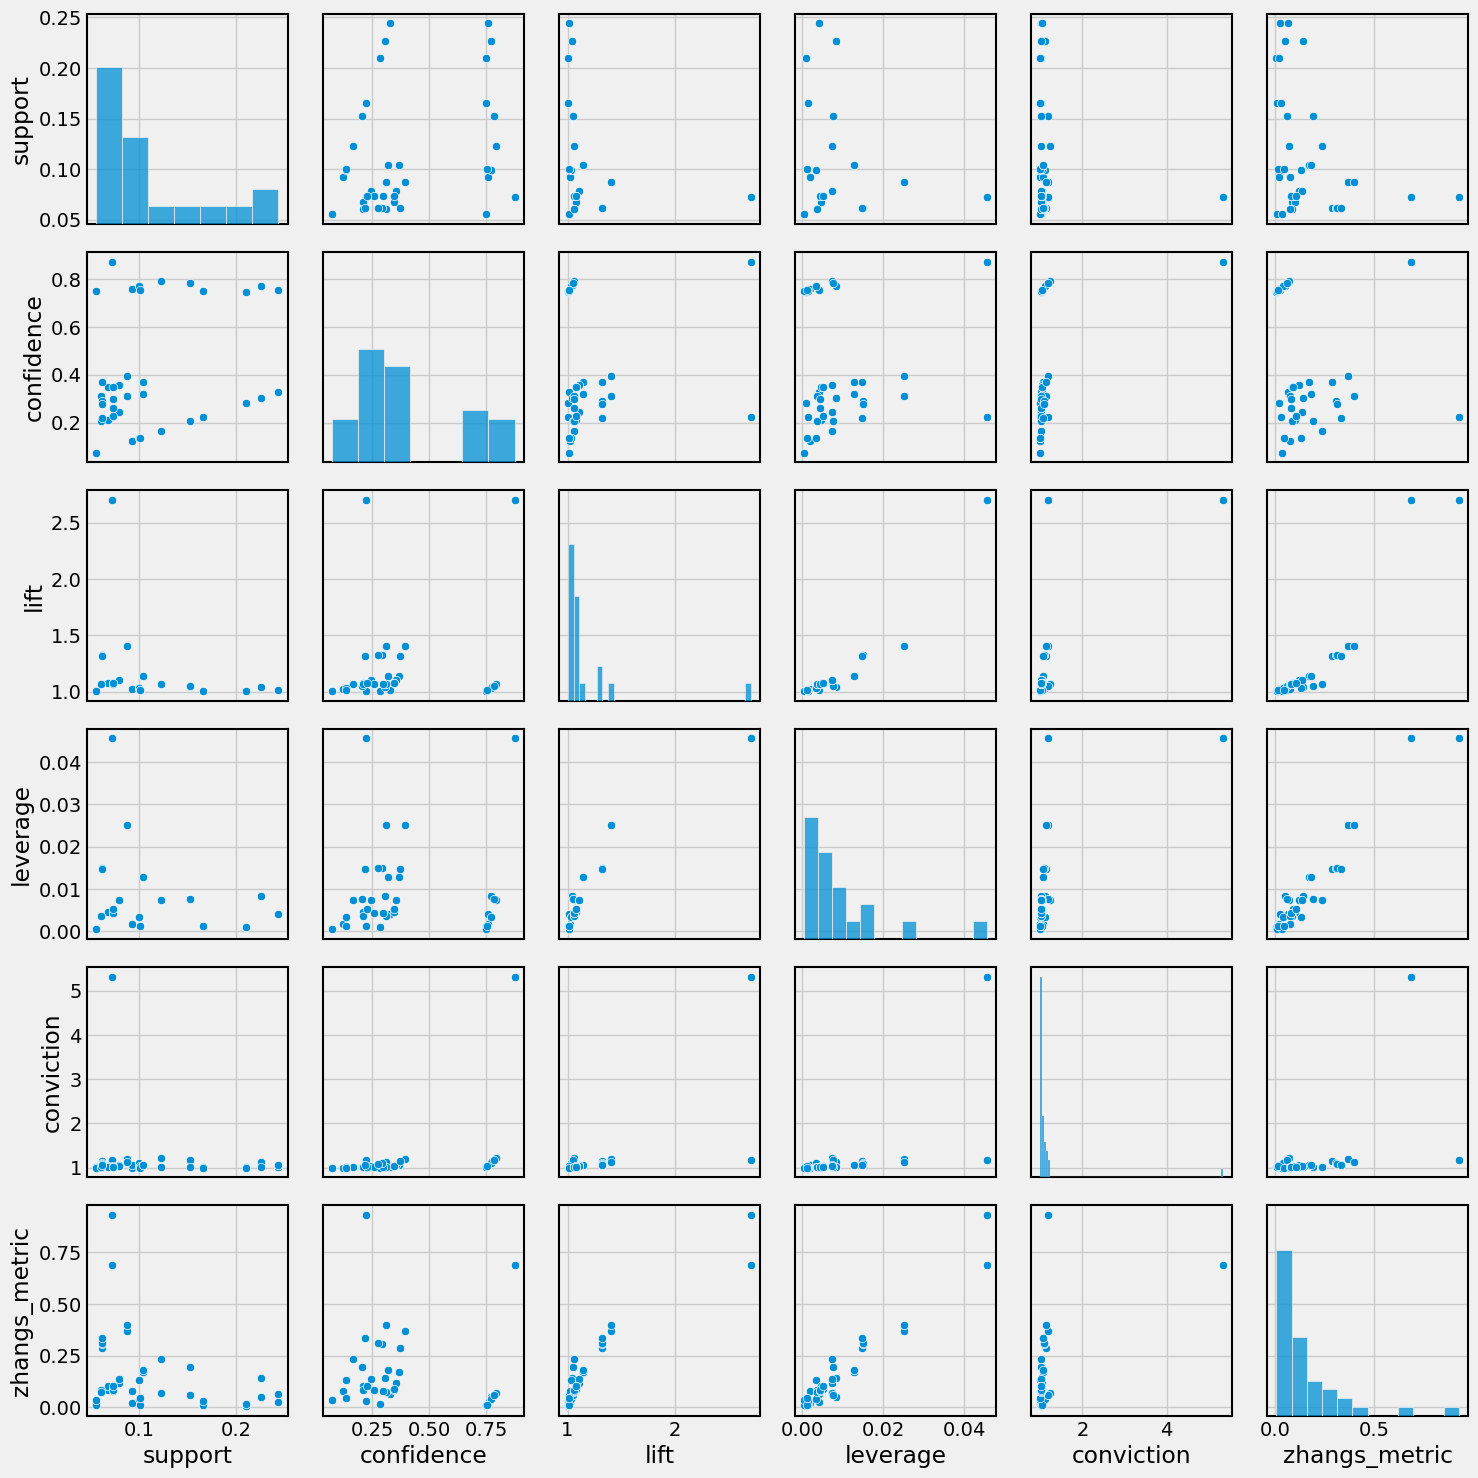

In [69]:
g = sns.pairplot(rules[cols])

# Add borders to each subplot (axes) in the pairplot
for ax in g.axes.flatten():
    for _, spine in ax.spines.items():
        spine.set_visible(True)  # Ensure spines are visible
        spine.set_linewidth(1.5)  # Set border line width
        spine.set_edgecolor('black')  # Set border color

# Show the plot
plt.tight_layout()
plt.show()

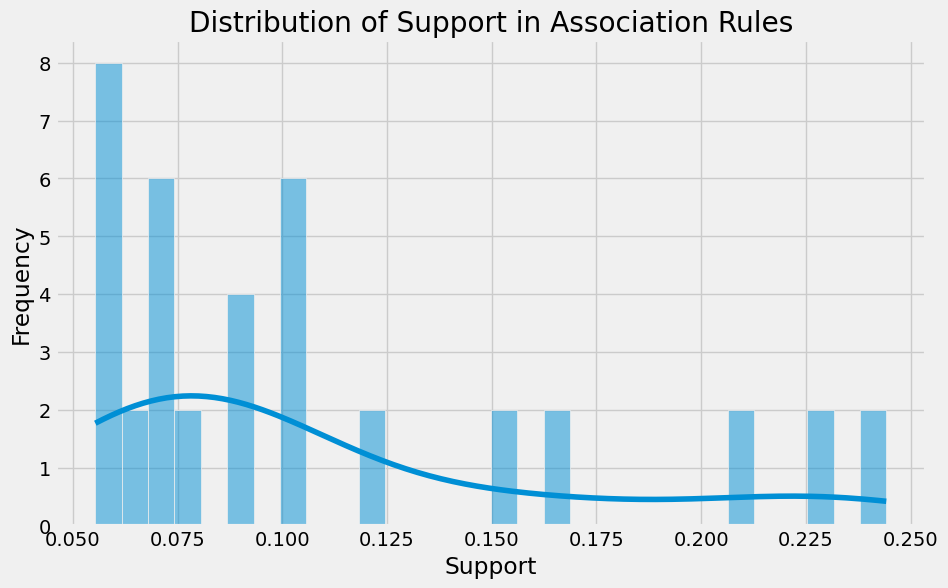

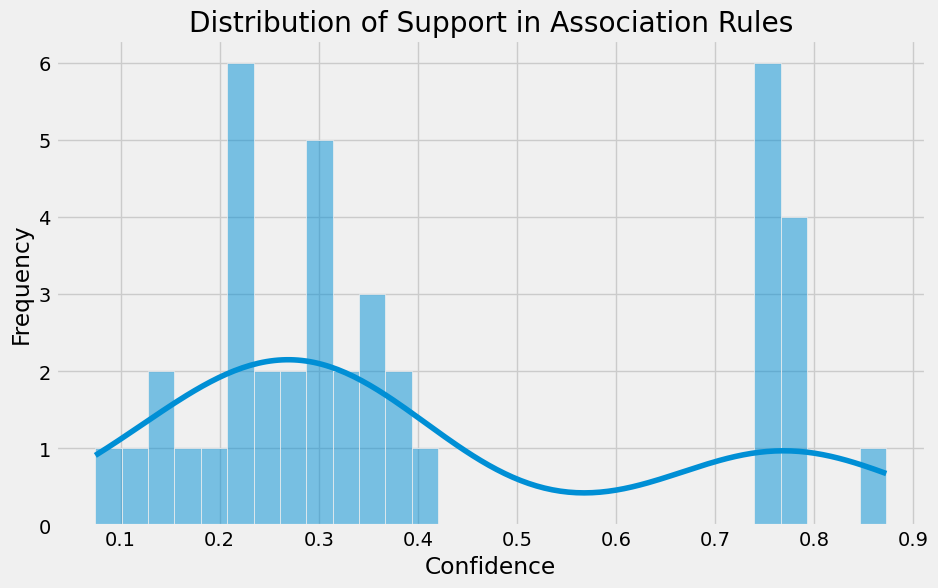

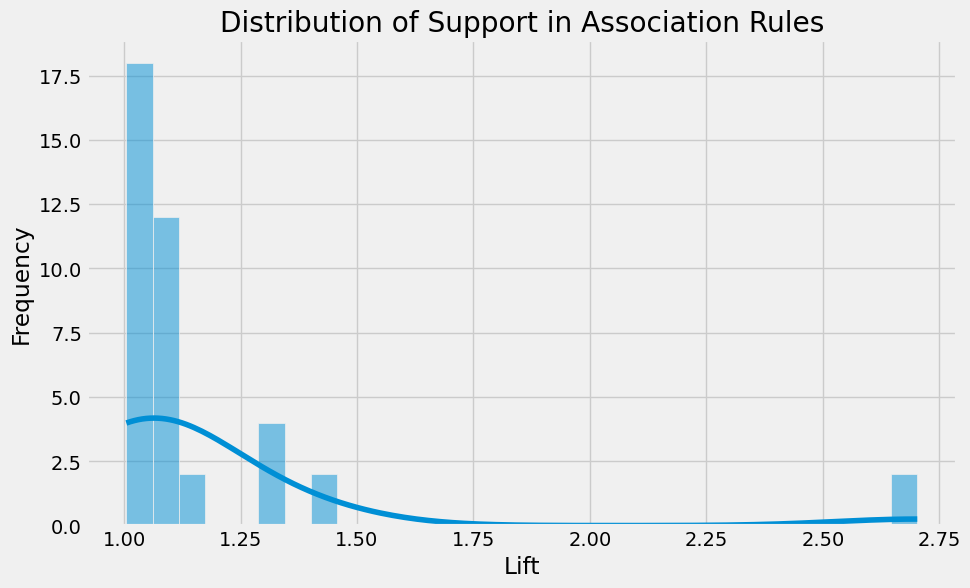

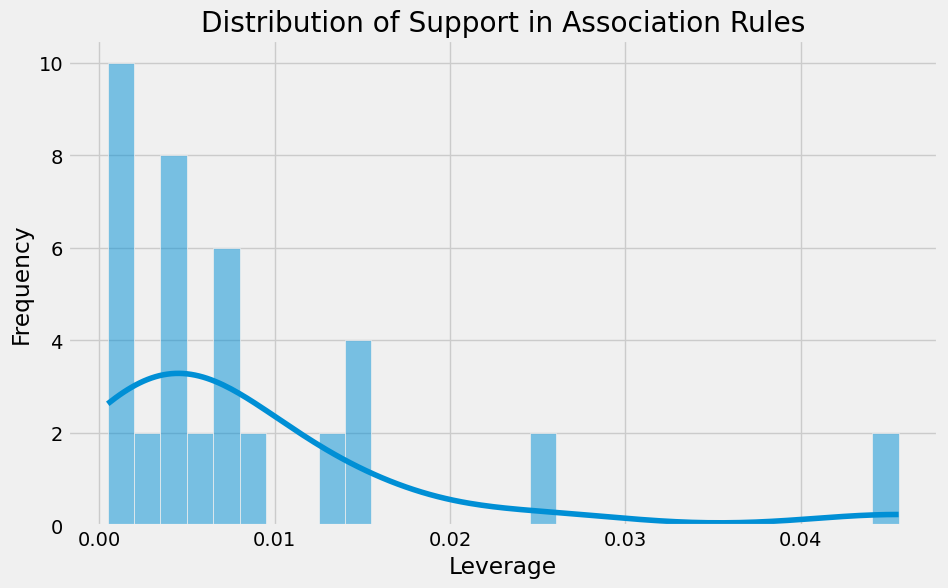

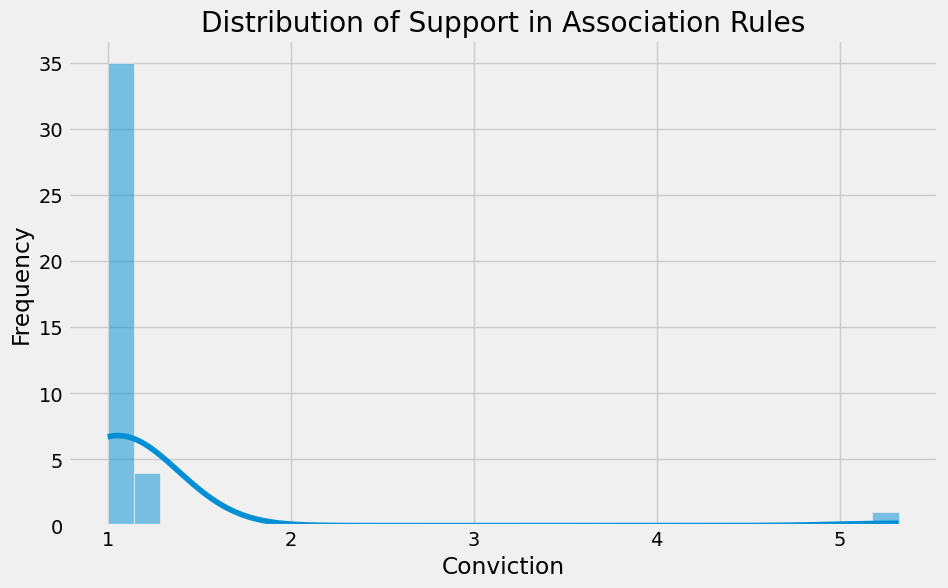

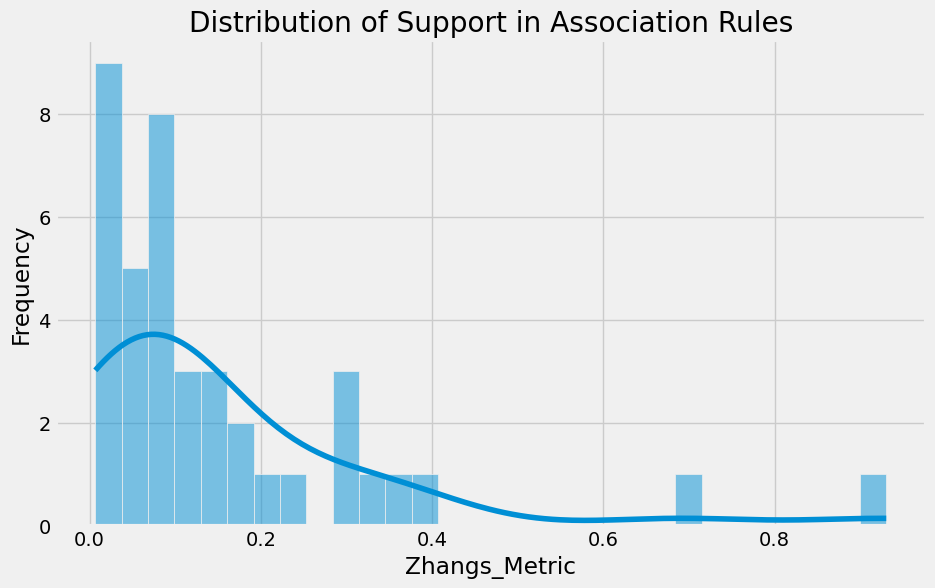

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(rules[col], bins=30, kde=True)
    plt.title('Distribution of Support in Association Rules')
    plt.xlabel(col.title())
    plt.ylabel('Frequency')
    plt.show()




In [71]:
rules = rules.drop(columns=['representativity', 'jaccard', 'certainty', 'kulczynski'])

In [72]:
# Filter rules with high lift (greater than 2) and confidence (greater than 0.5)
high_lift_rules = rules[
    ((rules['leverage'] > 0.004) & (rules['confidence'] > 0.7) & (rules['conviction'] > 1.1)) |  # Top-performing angbutter combinations
    ((rules['confidence'] > 0.3) & (rules['leverage'] > 0.01))  # Bread combinations
]

# Show the filtered high-quality rules
print(high_lift_rules.to_markdown())

|    | antecedents                                  | consequents                     |   antecedent support |   consequent support |   support |   confidence |    lift |   leverage |   conviction |   zhangs_metric |
|---:|:---------------------------------------------|:--------------------------------|---------------------:|---------------------:|----------:|-------------:|--------:|-----------:|-------------:|----------------:|
|  2 | frozenset({'americano'})                     | frozenset({'angbutter'})        |            0.155237  |             0.743406 | 0.122833  |     0.791262 | 1.06437 | 0.00742903 |      1.22926 |       0.0715947 |
|  6 | frozenset({'tiramisu croissant'})            | frozenset({'angbutter'})        |            0.293519  |             0.743406 | 0.226451  |     0.771502 | 1.03779 | 0.00824664 |      1.12296 |       0.051547  |
| 16 | frozenset({'orange pound'})                  | frozenset({'angbutter'})        |            0.195554  |             0.743406 

### Dropping Angbutter Products

In [85]:
# Drop the 'total_sales' and 'angbutter' columns from the bakery_sales DataFrame
sans_angbutter = bakery_data.drop(columns=['total_sales', 'angbutter'])

# List of product columns (from the fifth to the 26th column as per your description)
product_columns = ['plain bread', 'jam', 'americano', 'croissant', 'caffe latte', 'tiramisu croissant', 
                   'cacao deep', 'pain au chocolat', 'almond croissant', 'croque monsieur', 'mad garlic', 
                   'milk tea', 'gateau chocolat', 'pandoro', 'cheese cake', 'lemon ade', 'orange pound', 
                   'wiener', 'vanila latte', 'berry ade', 'tiramisu', 'merinque cookies']

# Remove rows where all product columns are zero
sans_angbutter = sans_angbutter.loc[~(sans_angbutter[product_columns].sum(axis=1) == 0)]

# Check the first few rows of the new DataFrame
print(sans_angbutter.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2334 entries, 0 to 2419
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            2334 non-null   datetime64[ns]
 1   day of week         2334 non-null   object        
 2   total               2334 non-null   float64       
 3   place               2095 non-null   object        
 4   plain bread         857 non-null    float64       
 5   jam                 220 non-null    float64       
 6   americano           412 non-null    float64       
 7   croissant           747 non-null    float64       
 8   caffe latte         193 non-null    float64       
 9   tiramisu croissant  779 non-null    float64       
 10  cacao deep          323 non-null    float64       
 11  pain au chocolat    587 non-null    float64       
 12  almond croissant    202 non-null    float64       
 13  croque monsieur     0 non-null      float64       
 1

In [90]:
# Create a basket where each column represents an item and 1 indicates a purchase of that item
sans_basket = sans_angbutter[item_columns].map(lambda x: 1 if x > 0 else 0)

In [111]:
# Apply the Apriori algorithm to find frequent itemsets with a minimum support of 0.1 (10%)
frequent_itemsets = apriori(sans_basket, min_support=0.05, use_colnames=True)

# Generate association rules with a minimum lift of 1
sans_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1, num_itemsets=4000)

# Show the first 10 association rules
print(sans_rules.to_markdown())

|    | antecedents                     | consequents                     |   antecedent support |   consequent support |   support |   confidence |    lift |   representativity |    leverage |   conviction |   zhangs_metric |   jaccard |   certainty |   kulczynski |
|---:|:--------------------------------|:--------------------------------|---------------------:|---------------------:|----------:|-------------:|--------:|-------------------:|------------:|-------------:|----------------:|----------:|------------:|-------------:|
|  0 | frozenset({'jam'})              | frozenset({'plain bread'})      |            0.0942588 |            0.367181  | 0.0822622 |     0.872727 | 2.37683 |                  1 | 0.0476522   |      4.97215 |      0.639556   |  0.216949 |  0.79888    |     0.548382 |
|  1 | frozenset({'plain bread'})      | frozenset({'jam'})              |            0.367181  |            0.0942588 | 0.0822622 |     0.224037 | 2.37683 |                  1 | 0.0476522   |      1

c:\Users\sbrya\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [112]:
cols = ['support', 'confidence', 'lift', 'leverage', 'conviction', 'zhangs_metric']

for col in cols:
    print(col, "\n---\n", \
        sans_rules[['antecedents', 'consequents', col]].sort_values(col, ascending=False).to_markdown(), '\n')

support 
---
 |    | antecedents                     | consequents                     |   support |
|---:|:--------------------------------|:--------------------------------|----------:|
|  2 | frozenset({'croissant'})        | frozenset({'plain bread'})      | 0.117823  |
|  3 | frozenset({'plain bread'})      | frozenset({'croissant'})        | 0.117823  |
|  4 | frozenset({'pain au chocolat'}) | frozenset({'croissant'})        | 0.0994002 |
|  5 | frozenset({'croissant'})        | frozenset({'pain au chocolat'}) | 0.0994002 |
|  0 | frozenset({'jam'})              | frozenset({'plain bread'})      | 0.0822622 |
|  1 | frozenset({'plain bread'})      | frozenset({'jam'})              | 0.0822622 |
|  6 | frozenset({'croissant'})        | frozenset({'wiener'})           | 0.0526992 |
|  7 | frozenset({'wiener'})           | frozenset({'croissant'})        | 0.0526992 | 

confidence 
---
 |    | antecedents                     | consequents                     |   confidence |
|---:|: